### Demonstrates some intuition of what happens when we multiply a matrix by a vector in the 2D case from the perspective of the SVD of that matrix.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)
mpl.style.use(["ggplot", "dark_background"])

### Get a matrix $A$.

In [2]:
# A is full rank.
A = np.array([[2, 3], [1, 0]], dtype=np.float32)
print(A)

[[2. 3.]
 [1. 0.]]


### Get SVD of $A$.

In [3]:
U, singulars, VT = np.linalg.svd(A)

* $A$ is rank 2 so the only vector in its kernel is the zero vector;
* Hence $x^TA^TAx=\|Ax\|^2>0$ for all $x\ne0$.
* Hence $A^TA$ is symmetric positive definite with all positive eigenvalues.
* Hence all singular values are also (non-zero) positive.

In [4]:
Sigma = np.diagflat(singulars)
print(f"Sigma:\n{Sigma}\n")
print(f"determinant of U is: {np.linalg.det(U).round(5)}\n")
print(f"determinant of VT is: {np.linalg.det(VT)}\n")

Sigma:
[[3.6502814 0.       ]
 [0.        0.8218544]]

determinant of U is: -1.0

determinant of VT is: 1.0



### A few informative pieces:
* All eigenvalues of $A^TA$ are positve (non-zero).
* Then from the factorisation of symmetric matrices $A^TA=Q\Lambda Q^T=V\Sigma^T\Sigma V^T$, where $\Sigma_{kk}=\sqrt{\Lambda_{kk}}$ and $Q=V$ is orthogonal basis of rowspace of $A$ (for this example).
* If $A$ was not full rank, we would have had more vectors in $Ker(A)$ and $\|Ax\|=0$ for some $x\ne0$ and $A^TA$ would be positive semi-definite. Then the first $r$ columns of $V$ would correspond to an orthogonal basis of the rowspace of $A$ with positive eigenvalues, while the remaining $n-r$ columns would be chosen from an orthogonal basis of the kernel of $A$ corresponding to a zero eigenvalue of $A^TA$. This holds since $Ker(A)=Ker(A^TA)$. Then, since the rowspace of $A$ is orthogonal to the kernel of $A$, $V$ is orthogonal.
* Similar arguments apply for $U$.
* Since $det(V^T)=det(V)=1$, we see that $V$ is a rotation matrix by some angle $\theta$.
* On the other hand, since in this example $det(U)=-1$, we see that $U$ is a reflection matrix.

### Getting a vector $x$ to multiply $A$.
* When multiplying $Ax$ for $A\in\mathbb{R}^{m\times n}$ we have that $x\in\mathbb{R}^n$. Since $V$ forms a(n) (orthogonal) basis for $\mathbb{R}^n$, for all $x\in\mathbb{R}^n$ we have $x=Vc$ for some coordinate vector $c\in\mathbb{R}^n$.

In [5]:
# let the vector c = (2, 3)^T
x = VT.T @ np.array([2., 3.]).reshape(-1, 1)
row_basis_1 = VT[0, :]
row_basis_2 = VT[1, :]

### $V^Tx$ rotates $x$ by some angle $\theta$ and $c$ is now the coordinate of the rotated $x$ with respect to the standard basis.
* If $V$ does anti-clockwise rotation by $\theta$, then $V^T$ will undo this rotation.

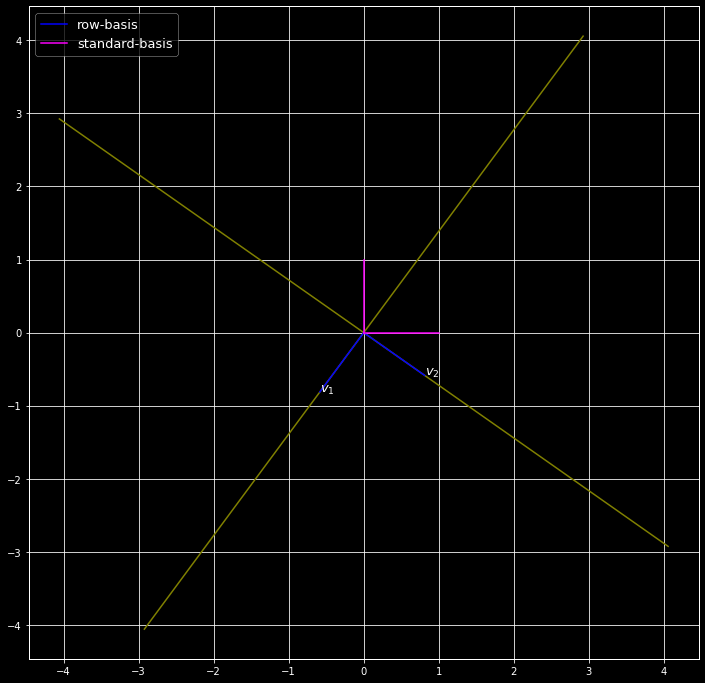

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
# get axes of starting basis i.e. columns in V.
ax.plot([-5 * row_basis_1[0], 5 * row_basis_1[0]], 
        [-5 * row_basis_1[1], 5 * row_basis_1[1]], color="olive")
ax.plot([-5 * row_basis_2[0], 5 * row_basis_2[0]],
       [-5 * row_basis_2[1], 5 * row_basis_2[1]], color="olive")
# get the actual basis vectors.
ax.plot([0, row_basis_1[0]], [0, row_basis_1[1]], color="blue", label="row-basis")
ax.annotate("$v_1$", (row_basis_1[0], row_basis_1[1]), size=13)
ax.plot([0, row_basis_2[0]], [0, row_basis_2[1]], color="blue")
ax.annotate("$v_2$", (row_basis_2[0], row_basis_2[1]), size=13)
# now get the rotated x.
ax.plot([0, 1], [0, 0], color="magenta", label="standard-basis")
ax.plot([0, 0], [0, 1], color="magenta")
ax.legend(fontsize=13)
plt.show()

### $\Sigma V^Tx$ puts $x$ on standard basis and scales the basis vectors by the corresponding singular values $\sigma_k$.

In [7]:
scaled_basis_1 = Sigma[:, 0]
scaled_basis_2 = Sigma[:, 1]

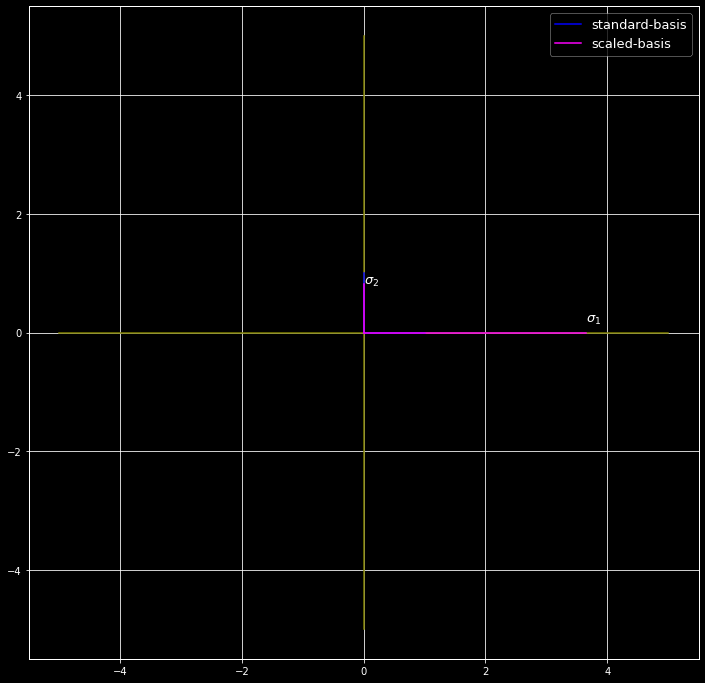

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
# get axes of standard basis.
ax.plot([0, 0], 
        [-5, 5], color="olive")
ax.plot([-5, 5],
       [0, 0], color="olive")
# get the actual standard basis vectors.
ax.plot([0, 1], [0, 0], color="blue", label="standard-basis")
ax.plot([0, 0], [0, 1], color="blue")
# now get the scaled basis and x.
ax.plot([0, scaled_basis_1[0]], [0, scaled_basis_1[1]], color="magenta", 
        label="scaled-basis", alpha=0.5)
ax.annotate("$\sigma_1$", (scaled_basis_1[0], scaled_basis_1[1]), size=13,
           textcoords="offset points", xytext=(0., 10.))
ax.plot([0, scaled_basis_2[0]], [0, scaled_basis_2[1]], color="magenta", alpha=0.5)
ax.annotate("$\sigma_2$", (scaled_basis_2[0], scaled_basis_2[1]), size=13)
ax.legend(fontsize=13)
plt.show()

### $U$ will now reflect the axes;

In [9]:
reflected_basis = U @ Sigma
reflected_basis_1 = reflected_basis[:, 0]
reflected_basis_2 = reflected_basis[:, 1]

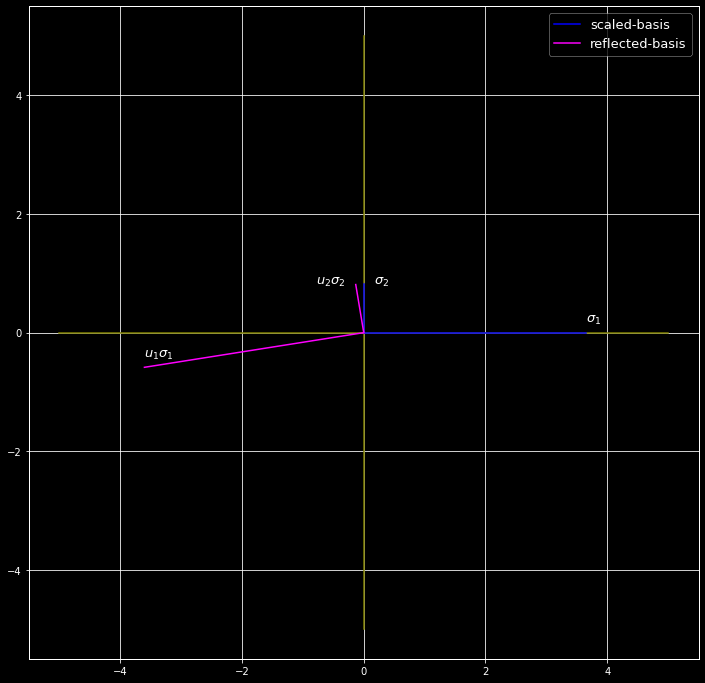

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
# get axes of standard basis.
ax.plot([0, 0], 
        [-5, 5], color="olive")
ax.plot([-5, 5],
       [0, 0], color="olive")
# now get the scaled basis and x.
ax.plot([0, scaled_basis_1[0]], [0, scaled_basis_1[1]], color="b", 
        label="scaled-basis")
ax.annotate("$\sigma_1$", (scaled_basis_1[0], scaled_basis_1[1]), size=13,
           textcoords="offset points", xytext=(0., 10.))
ax.plot([0, scaled_basis_2[0]], [0, scaled_basis_2[1]], color="b")
ax.annotate("$\sigma_2$", (scaled_basis_2[0], scaled_basis_2[1]), size=13,
           textcoords="offset points", xytext=(10., 0.))
# now get reflected basis;
ax.plot([0, reflected_basis_1[0]], [0, reflected_basis_1[1]], color="magenta", 
        label="reflected-basis")
ax.annotate("$u_1\sigma_1$", (reflected_basis_1[0], reflected_basis_1[1]), size=13,
           textcoords="offset points", xytext=(0., 10.))
ax.plot([0, reflected_basis_2[0]], [0, reflected_basis_2[1]], color="magenta")
ax.annotate("$u_2\sigma_2$", (reflected_basis_2[0], reflected_basis_2[1]), size=13,
           textcoords="offset points", xytext=(-40., 0.))
ax.legend(fontsize=13)
plt.show()

### $c=(2, 3)^T$ is the coordinate of $Ax$ in the reflected scaled basis (magenta colour) plotted above.

In [11]:
assert all((A @ x).round(5) == (reflected_basis @ np.array([2., 3.]).reshape(-1, 1)).round(5))

* The point is that any vector $x\in\mathbb{R}^2$ can be expressed as a linear combination of the columns of $V$ since these form a basis for $\mathbb{R}^2$.
* Then multiplying on the left by $V^T$ puts $x$ back on the standard basis of $\mathbb{R}^2$ by rotating by some angle $\theta$.
* Then multiplying on the left by $\Sigma$ just rescales the standard basis by the singular values (in the main diagonal of $\Sigma$).
* Finally, in this case, $U$ reflects the scaled standard basis along some line corresponding to an angle $\psi$. In general $U$ can be a rotation matrix as well.
* Essentially, the SVD can be expressed as a function of angles $\theta$ and $\psi$ as well as scaling factors $\sigma_k$ stored in the main diagonal of $\Sigma$.